# Comparison between importance and adaptive stratified sampling in vegas+

In [1]:
import vegas
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# setup

dim_min = 1
dim_max = 10
# data set
n_eval = 1e5
n_iter = 10

# 10% training-warmup
training_rate = 0.1
n_eval_warmup = int(training_rate*n_eval)
n_eval_testing = int(n_eval-n_eval_warmup)

n_iter_warmup = 5

In [3]:
def f(x,dim=None):
    if dim is None:
        dim = x.shape[-1]
    dx2 = 0
    a = 0.1
    coef = (1.0/a/np.sqrt(np.pi))**dim
    for d in range(dim):
        dx2 += (x[d] - 0.5) ** 2
    return math.exp(-dx2 * 100.) * coef


def integration(dim,integrand,isStratified,isImportance):

    #assign integration volume to integrator
    region = dim * [[0.,1.]]


    if isStratified and isImportance:
        integ = vegas.Integrator(region)
    elif not isStratified:
        integ = vegas.Integrator(region,max_nhcube=1) # stratified off
    else:
        integ = vegas.Integrator(region,adapt=False) # no adaptation


    # adapt to the integrand; discard results
    integ(integrand,nitn=n_iter_warmup,neval=n_eval_warmup)



    # proper integration
    result = integ(integrand,nitn=n_iter,neval=n_eval_testing)
    print(f"Stratifications {np.array(integ.nstrat)}")
    print("\n Grid \n")
    print(integ.map.settings())

    return result.mean, result.sdev

def generate_simulation_per_type(isStratified,isImportance):
    errors = []
    integrals = []
    dim = dim_min
    while dim < dim_max+1:
        result = integration(dim,f,isStratified,isImportance)
        integrals.append(result[0])
        errors.append(result[1])
        dim += 1

    return integrals, errors

def generate_simulation():
    print("--------IMPORTANCE SAMPLING INTEGRATION--------")
    importance = generate_simulation_per_type(isStratified=False,isImportance=True)
    print("--------ADAPTIVE STRATIFIED INTEGRATION--------")
    stratified = generate_simulation_per_type(isStratified=True,isImportance=False)
    print("--------VEGAS+ INTEGRATION---------")
    vegas = generate_simulation_per_type(isStratified=True,isImportance=True)

    return importance,stratified,vegas

def make_plot(importance,stratified,vegas):
    fig, ax = plt.subplots()
    dims = [i for i in range(dim_min,dim_max+1)]

    ax.errorbar(dims, vegas[0],
                yerr=vegas[1],
                fmt='-o',label="vegas+")

    ax.errorbar(dims, stratified[0],
                yerr=stratified[1],
                fmt='-o',label="stratified")

    ax.errorbar(dims, importance[0],
                yerr=importance[1],
                fmt='-o',label="importance sampling")


    ax.set_xlabel('dimensions (D)')
    ax.set_ylabel('integral estimate (I)')
    ax.set_title('Comparison between Importance and Stratified Sampling')
    ax.legend()
    plt.show()

def make_second_plot(importance,stratified):
    fig, ax = plt.subplots()
    dims = [i for i in range(dim_min,dim_max+1)]

    ax.errorbar(dims, vegas[0],
                yerr=vegas[1],
                fmt='-o',label="vegas+")

    #ax.errorbar(dims, stratified[0],
    #            yerr=stratified[1],
    #            fmt='-o',label="stratified")

    ax.errorbar(dims, importance[0],
                yerr=importance[1],
                fmt='-o',label="importance sampling")


    ax.set_xlabel('dimensions (D)')
    ax.set_ylabel('integral estimate (I)')
    ax.set_title('Comparison between Vegas+ e Importance Sampling')
    ax.legend()
    plt.show()


In [4]:
# generate simulation
importance, stratified, vegas = generate_simulation()

--------IMPORTANCE SAMPLING INTEGRATION--------
Stratifications [1]

 Grid 

    grid[ 0] = [0.404 0.461 0.5   0.539 0.596]

Stratifications [1 1]

 Grid 

    grid[ 0] = [0.403 0.461 0.5   0.539 0.597]
    grid[ 1] = [0.403 0.461 0.5   0.539 0.597]

Stratifications [1 1 1]

 Grid 

    grid[ 0] = [0.403 0.461 0.5   0.539 0.598]
    grid[ 1] = [0.403 0.46  0.5   0.539 0.597]
    grid[ 2] = [0.403 0.461 0.5   0.539 0.597]

Stratifications [1 1 1 1]

 Grid 

    grid[ 0] = [0.403 0.46  0.499 0.539 0.598]
    grid[ 1] = [0.402 0.46  0.5   0.54  0.597]
    grid[ 2] = [0.403 0.461 0.5   0.54  0.597]
    grid[ 3] = [0.403 0.46  0.5   0.54  0.598]

Stratifications [1 1 1 1 1]

 Grid 

    grid[ 0] = [0.401 0.459 0.5   0.54  0.598]
    grid[ 1] = [0.402 0.46  0.5   0.539 0.598]
    grid[ 2] = [0.402 0.46  0.5   0.54  0.598]
    grid[ 3] = [0.402 0.462 0.5   0.54  0.599]
    grid[ 4] = [0.401 0.46  0.5   0.539 0.598]

Stratifications [1 1 1 1 1 1]

 Grid 

    grid[ 0] = [0.4   0.461 0.502 0.54

Stratifications [2 2 2 2 2 2 2 2 2 2]

 Grid 

    grid[ 0] = [0.396 0.461 0.503 0.544 0.604]
    grid[ 1] = [0.397 0.459 0.5   0.543 0.605]
    grid[ 2] = [0.398 0.46  0.501 0.544 0.602]
    grid[ 3] = [0.397 0.458 0.501 0.545 0.605]
    grid[ 4] = [0.399 0.46  0.503 0.545 0.604]
    grid[ 5] = [0.397 0.459 0.501 0.543 0.605]
    grid[ 6] = [0.397 0.458 0.501 0.54  0.604]
    grid[ 7] = [0.398 0.458 0.501 0.54  0.604]
    grid[ 8] = [0.4   0.461 0.503 0.544 0.604]
    grid[ 9] = [0.398 0.461 0.503 0.546 0.605]



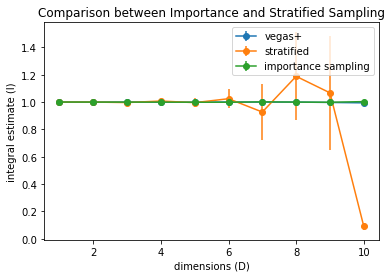

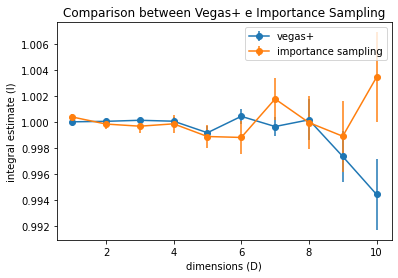

In [5]:
make_plot(importance,stratified,vegas)
make_second_plot(importance,vegas)
